## Inspect result after hide one, two, ..., five items

### RBM hidden=10000

In [1]:
model = {}

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('../rbm_results-early-10000.csv', index_col=0)
data['total_missing'] = data['missing'].str.split(',').str.len() + 1
data['total_missing'] = np.where(data['missing'] == 'set()', 1, data['total_missing'])

model['RBM-CF 10000'] = data

rbm_pivot_10000 = data.groupby(['metric', 'total_missing'])['value'].agg(["mean", "std"]) \
    .pivot_table(index=['total_missing'], columns='metric', values=['mean', 'std'])
rbm_pivot_10000

mean                                     std            \
metric         Accuracy     Hit@5     MAP@5      MDCG  Accuracy     Hit@5   
total_missing                                                               
1              0.308956  0.504236  0.310148  0.526222  0.138047  0.134807   
2              0.293866  0.490090  0.299615  0.514232  0.138268  0.137843   
3              0.270424  0.468710  0.284585  0.495432  0.139843  0.147122   
4              0.236070  0.435230  0.265492  0.467443  0.138019  0.156902   
5              0.190834  0.391108  0.242385  0.430177  0.136446  0.166374   

                                   
metric            MAP@5      MDCG  
total_missing                      
1              0.153247  0.108640  
2              0.154091  0.109708  
3              0.161543  0.113643  
4              0.171506  0.116028  
5              0.182465  0.118258

### RBM hidden=1000

In [3]:
data = pd.read_csv('../rbm_results-early-1000.csv', index_col=0)
data['total_missing'] = data['missing'].str.split(',').str.len() + 1
data['total_missing'] = np.where(data['missing'] == 'set()', 1, data['total_missing'])

model['RBM-CF 1000'] = data

rbm_pivot_1000 = data.groupby(['metric', 'total_missing'])['value'].agg(["mean", "std"]) \
    .pivot_table(index=['total_missing'], columns='metric', values=['mean', 'std'])
rbm_pivot_1000

mean                                     std            \
metric         Accuracy     Hit@5     MAP@5      MDCG  Accuracy     Hit@5   
total_missing                                                               
1              0.315051  0.500302  0.302950  0.528862  0.129687  0.123641   
2              0.287901  0.479772  0.286766  0.509240  0.128105  0.125535   
3              0.252379  0.447512  0.265785  0.481581  0.124948  0.130455   
4              0.205148  0.399988  0.239667  0.443232  0.115697  0.131889   
5              0.143989  0.332309  0.204342  0.391438  0.102154  0.129164   

                                   
metric            MAP@5      MDCG  
total_missing                      
1              0.145746  0.101488  
2              0.144174  0.101577  
3              0.146375  0.102420  
4              0.146924  0.099065  
5              0.140609  0.090665

### Frequency

In [4]:
data = pd.read_csv('../common_results.csv', index_col=0)
data['total_missing'] = data['missing'].str.split(',').str.len() + 1
#data = data[nn_data['fold'] == 1]
data['total_missing'] = np.where(data['missing'] == 'set()', 1, data['total_missing'])

#model['Frequency'] = data

common_pivot = data.groupby(['metric', 'total_missing'])['value'].agg(["mean", "std"]) \
    .pivot_table(index=['total_missing'], columns='metric', values=['mean', 'std'])

common_pivot

mean                                    std            \
metric         Accuracy    Hit@5     MAP@5      MDCG  Accuracy     Hit@5   
total_missing                                                              
1              0.251114  0.45534  0.305165  0.484906  0.141620  0.164311   
2              0.251114  0.45534  0.305165  0.484906  0.139706  0.162090   
3              0.251114  0.45534  0.305165  0.484906  0.139472  0.161819   
4              0.251114  0.45534  0.305165  0.484906  0.139472  0.161819   
5              0.251114  0.45534  0.305165  0.484906  0.139706  0.162090   

                                   
metric            MAP@5      MDCG  
total_missing                      
1              0.163485  0.121722  
2              0.161276  0.120077  
3              0.161006  0.119876  
4              0.161006  0.119876  
5              0.161276  0.120077

### KNN

In [5]:
data = pd.read_csv('../nn_results.csv', index_col=0)
data['total_missing'] = data['missing'].str.split(',').str.len() + 1
#data = data[nn_data['fold'] == 1]
data['total_missing'] = np.where(data['missing'] == 'set()', 1, data['total_missing'])

model['kNN'] = data

knn_pivot = data.groupby(['metric', 'total_missing'])['value'].agg(["mean", "std"]) \
    .pivot_table(index=['total_missing'], columns='metric', values=['mean', 'std'])

knn_pivot

mean                                     std            \
metric         Accuracy     Hit@5     MAP@5      MDCG  Accuracy     Hit@5   
total_missing                                                               
1              0.356083  0.525216  0.303942  0.544766  0.131148  0.128174   
2              0.344266  0.513771  0.301694  0.534732  0.135252  0.128325   
3              0.327145  0.493465  0.298031  0.519355  0.138631  0.136337   
4              0.303932  0.466727  0.292534  0.498830  0.143229  0.144474   
5              0.278281  0.431850  0.286343  0.474405  0.147527  0.154774   

                                   
metric            MAP@5      MDCG  
total_missing                      
1              0.155788  0.103685  
2              0.153770  0.105935  
3              0.153436  0.110931  
4              0.153784  0.116327  
5              0.154991  0.122391

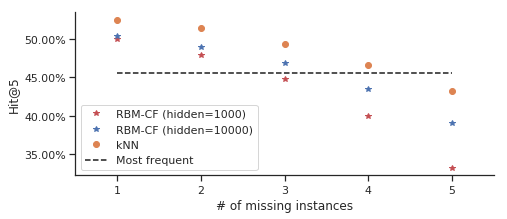

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

#pivot['mean']['Hit@5'].plot(yerr=pivot['std']['Hit@5'])
df = pd.DataFrame([
    rbm_pivot_1000['mean']['Hit@5'],
    rbm_pivot_10000['mean']['Hit@5'],
    knn_pivot['mean']['Hit@5'],
    common_pivot['mean']['Hit@5']
]).T
df.columns = ['RBM-CF (hidden=1000)', 'RBM-CF (hidden=10000)', 'kNN', 'Most frequent']
ax = df.plot(style=['r*', '*', 'o', '--k'], figsize=(7.5, 3))#yerr=[rbm_pivot['std']['Hit@5'], knn_pivot['std']['Hit@5'], (0,0,0,0,0)])
ax.set_xlabel('# of missing instances')
ax.set_ylabel('Hit@5');
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.xlim([0.5, 5.5])

#plt.ylim([-3, 3])
sns.despine();
ax.get_figure().savefig("hit5-multiple.pdf", bbox_inches='tight')

In [7]:
for k, v in model.items():
    v['model'] = k

/home/paulo/git/RBM/venv/lib/python3.6/site-packages/seaborn-0.9.0-py3.6.egg/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


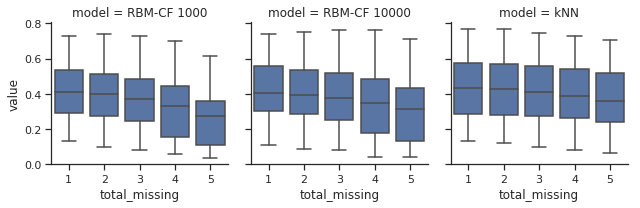

In [8]:
g = sns.FacetGrid(pd.concat(model), col="model", sharex=False)
g.map(sns.boxplot, 'total_missing', 'value')#, 'fold'

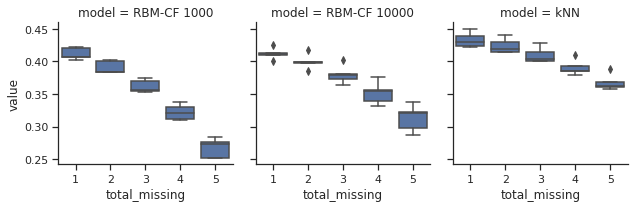

In [9]:
means_model = {k: v.groupby(['fold', 'total_missing']).mean() for k, v in model.items()}

for k, v in means_model.items():
    v['model'] = k
    means_model[k] = v.reset_index('total_missing')

means_model['kNN']
g = sns.FacetGrid(pd.concat(means_model), col="model", sharex=False)
g.map(sns.boxplot, 'total_missing', 'value')#, 'fold'